# Linear Regression Model

In [1]:
# Branche ekleme yapiyorum

In [2]:
import pandas as pd
data =pd.read_csv('Advertising.csv')
df = data.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df = df.iloc[:,1:]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


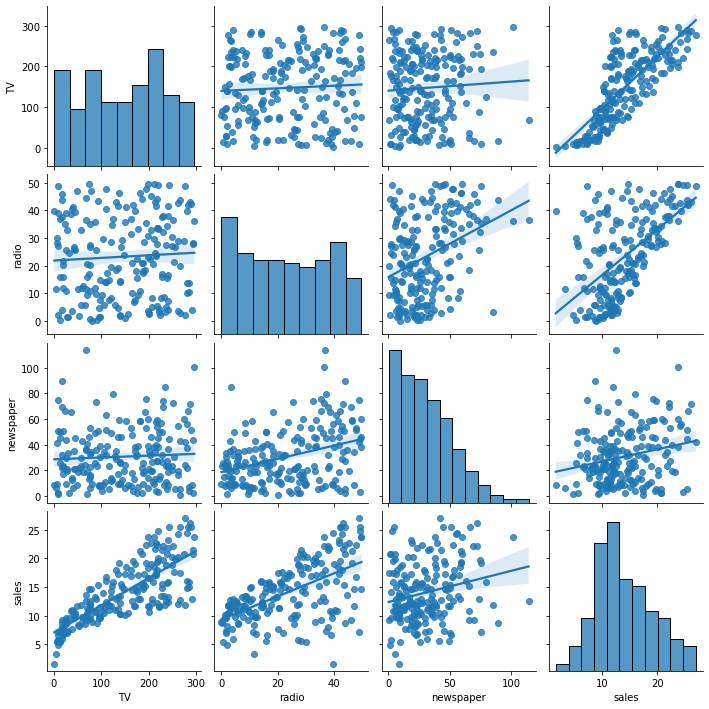

In [8]:
import seaborn as sns
sns.pairplot(df, kind = 'reg');

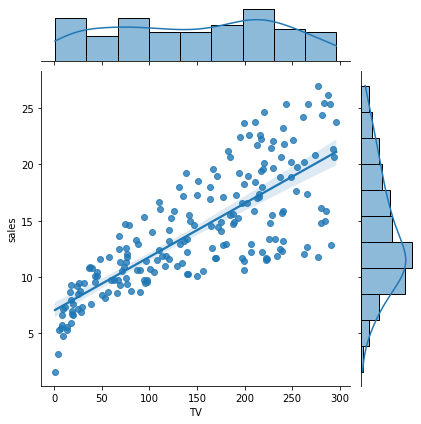

In [9]:
sns.jointplot(x='TV', y= 'sales', data=df, kind = 'reg');

#burda degiskenleri tanimak istiyoruz 

### Statsmodels ile modelleme ve ciktilari yorumlama

In [10]:
X = df[['TV']]   #burda bir daha köseli koymasinin sebebi,ciktinin tablo seklinde gözükmesi icin
X[0:5]           #köseliyi silip, calistirinca asagidaki islemlerde bir desiklk olmadi

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [11]:
import statsmodels.api as sm
X = sm.add_constant(X)  #matris isleminin yapilmasi icin ekledik,cünkü kendisi sadece 1 sütundu 
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [12]:
y= df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [13]:
#import statsmodels.api as sm

lm = sm.OLS(y,X)   #model kurduk,sklearn'de istatiki aciklamalar verilmedigi icin böyle yaptik
model = lm.fit()
model.summary()

#bu tüm degiskenleri gösterecek yazim sekli

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        00:34:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#TV-coef TV verilen 1 birimlik artista satilar bu kadar artiyor

In [15]:
import statsmodels.formula.api as smf   #bunun importu yukaridakinden biraz farkli
lm = smf.ols('sales ~ TV', df)   #burdada istedigin degiskenleri secerek bu tabloyu aliyorsun
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        00:34:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [17]:
print('Sales= '+ str( '%.2f' %model.params[0])+' + ' + 'TV*'+ str( '%.2f' %model.params[1]))

#simdi bunun denklemini yazayim

Sales= 7.03 + TV*0.05


In [18]:
model.summary().tables[1]
#bu yukarida ki tablo 3 kisimdan olusuyor,eger orta kismi görmek icin[1] yazdik

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [19]:
model.conf_int()

#sadece modelin güven araliklarini görmek istersen

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [20]:
print(model.f_pvalue)           # Prob (F-statistic):	1.47e-42 tablodan

print('f_pvalue: ','%.4f' %model.f_pvalue)   #buda e den kurtulmak icin

#e-42 10 üzeri eksi 42 demek

1.467389700194647e-42
f_pvalue:  0.0000


In [21]:
print('fvalue: ','%.2f' %model.fvalue)    # F-statistic:	312.1 tablodan

fvalue:  312.14


In [22]:
print('tvalue: ','%.2f' %model.tvalues[0:1])    #yukaridaki biliglendirmede t degeri,anlamlilikla ilgil

tvalue:  15.36


In [23]:
 model.mse_model  #bu sayi bunun icin cok korkunc dedi

3314.618166868649

In [24]:
model.rsquared   #Rkare degeri

0.611875050850071

In [25]:
model.rsquared_adj   #Adjusted R squared 

0.6099148238341623

In [26]:
model.fittedvalues[0:5] #modelin tahmin ettgi degerler ,sklearn'de predict ile yapiyorduk ama burda farkli

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [27]:
y[0:5]   #gercek y degerleri

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [28]:
print('Satis = ' + str('%.2f' %model.params[0])+ ' + ' + 'TV*'+ str('%.2f'% model.params[1]))

Satis = 7.03 + TV*0.05


/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


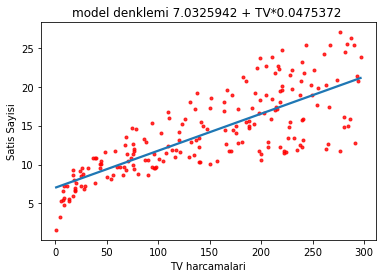

In [29]:
g= sns.regplot(df['TV'],df['sales'], ci=None, scatter_kws= {'color':'r','s':9})
g.set_title('model denklemi 7.0325942 + TV*0.0475372 ')
g.set_xlabel('TV harcamalari')
g.set_ylabel('Satis Sayisi');

## bunlari birde Sklearn ile yapialim

In [30]:
from sklearn.linear_model import LinearRegression
X = df[['TV']]    #modeli bir sütunla kurdum,birtane daha köseli koymayinca hata verdi "2D required dedi"
y = df['sales']
reg = LinearRegression()
model = reg.fit(X,y)
model


#summary diye bir özelligi yok

LinearRegression()

In [31]:
model.intercept_   #bunlarla yukaridaki denklemi alabiliyoruz

7.0325935491276965

In [32]:
model.coef_

array([0.04753664])

In [33]:
model.predict([[30]])

/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [34]:
model.predict([[30],[40]])

/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276, 8.93405917])

## Residual (re-zii-cuuııl)  .gercek ve hata arasındakı fark

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

model = smf.ols('sales ~ TV', df)
model = model.fit()

In [36]:
mse = mean_squared_error(y, model.fittedvalues)
mse

10.512652915656757

In [37]:
import numpy as np
rmse =  np.sqrt(mse)  # root mean squared error
rmse

3.2423221486546887

In [38]:
X_pred = model.predict(X)[:10]   #X Tv sütunu 199 deger var icinde  

In [39]:
X_pred

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
5     7.446162
6     9.765950
7    12.746498
8     7.441409
9    16.530414
dtype: float64

In [40]:
y[:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [41]:
k_t = pd.DataFrame({'tahmin Degerleri': X_pred[0:10], 'Gercek Degerler': y[0:10]})

In [42]:
k_t

,tahmin Degerleri,Gercek Degerler
0,17.970775,22.1
1,9.147974,10.4
2,7.850224,9.3
3,14.234395,18.5
4,15.627218,12.9
5,7.446162,7.2
6,9.765950,11.8
7,12.746498,13.2
8,7.441409,4.8
9,16.530414,10.6


In [43]:
k_t['hata_miktari'] = k_t['Gercek Degerler'] - k_t['tahmin Degerleri']

In [44]:
k_t

,tahmin Degerleri,Gercek Degerler,hata_miktari
0,17.970775,22.1,4.129225
1,9.147974,10.4,1.252026
2,7.850224,9.3,1.449776
3,14.234395,18.5,4.265605
4,15.627218,12.9,-2.727218
5,7.446162,7.2,-0.246162
6,9.765950,11.8,2.034050
7,12.746498,13.2,0.453502
8,7.441409,4.8,-2.641409
9,16.530414,10.6,-5.930414


In [45]:
k_t['Hata_karaler'] = k_t['hata_miktari']**2
k_t

,tahmin Degerleri,Gercek Degerler,hata_miktari,Hata_karaler
0,17.970775,22.1,4.129225,17.050503
1,9.147974,10.4,1.252026,1.567569
2,7.850224,9.3,1.449776,2.101851
3,14.234395,18.5,4.265605,18.195390
4,15.627218,12.9,-2.727218,7.437719
5,7.446162,7.2,-0.246162,0.060596
6,9.765950,11.8,2.034050,4.137358
7,12.746498,13.2,0.453502,0.205664
8,7.441409,4.8,-2.641409,6.977040
9,16.530414,10.6,-5.930414,35.169814


In [46]:
np.sum(k_t['Hata_karaler'])  #toplam hata

92.90350329638103

In [47]:
np.mean(k_t['Hata_karaler'])   #ortalama hatalari

9.290350329638104

In [48]:
np.sqrt(np.mean(k_t['Hata_karaler']))

3.0480075999967755

In [49]:
model.resid[:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

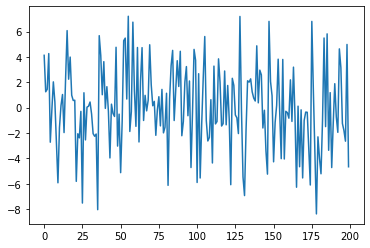

In [50]:
import matplotlib.pyplot as plt
plt.plot(model.resid);          #hatalarin gözlemlenmesi,bu gözlem degerlerine gidip bakmak gerekir

# Multiple Linear Regression

In [51]:
df.head()    #Adversiting veris seti

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [52]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [53]:
X = df.drop('sales', axis=1)   #icinde 3 sütun var,multiple yapacagiz
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
print(len(X_train))
print(X_train.shape)

160
(160, 3)


In [55]:
traning = df.copy()   #belki lazim olur diye yapti

### Multiple Regressionu iki sekilde kuracagiz 

1- Statsmodel

In [56]:
#bu eger yorum yapacaksan kullanilir genelde, eger diger aldoritmalarla ayni dili konussun 
#ve islemler daha agirlikta olacaksa, sklearn daha iyi

In [57]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                   1.28e-137
Time:                        00:34:54   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2- scikit_learn ile bir model kuralim

In [58]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [59]:
model.intercept_

2.979067338122629

In [60]:
model.coef_    #3 tane sütun oldugu icin,tv,radio,newspaper

array([0.04472952, 0.18919505, 0.00276111])

In [61]:
y_pred = model.predict(X_test)
y_pred[:5]

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326])

# Model Tuning / Model dogrulama

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test

1.7815996615334506

In [63]:
rmse_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse_train

#acaba modelin hatasini niye buluyoruz

1.6447277656443373

In [64]:
model.score(X_train, y_train)  


#yukarida bölerken random_state yazdigin sayilari degistirisen bu degrler degisir,
#cünkü datanin varkli yerlerini aliyoruz
#cros validation ile bu sorunu gideriyourz 

0.8957008271017817

Cross_validation uygulama

rkare icin

In [65]:
cross_val_score(model, X_train, y_train, cv=10, scoring = 'r2') 
# veriden farkli farkli bölümleri alarak, birbirinden farkli 10 rkare degeri geldi

array([-0.10975169,  0.87992761,  0.88460907,  0.95616404,  0.93017934,
        0.92369938,  0.86467693,  0.95081368,  0.7622523 ,  0.87097792])

In [66]:
cross_val_score(model, X_train, y_train, cv=10, scoring = 'r2').mean()

#daha dogru rkare degeri bulmus olduk

0.791354859691634

In [67]:
cross_val_score(model, X, y, cv=10, scoring = 'r2').mean()   
#tüm model icin valide adilmis bir rkare degeri

0.8853562237979616

neg_mean_squared_error

In [68]:
-cross_val_score(model, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error')  
#basina eksi koyup daha iyi anlayabiliriz ,yoksa cevaplar eksili oluyor

array([5.57303426, 2.86235681, 2.06504684, 1.09186983, 1.66159795,
       2.50694042, 2.92821679, 2.01207197, 7.2250041 , 1.66156243])

In [69]:
-cross_val_score(model, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error').mean()

#bu bizim gercek egitim hatamiz

2.9587701386797565

root buluyoruz

In [70]:
np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error'))

#root mean squared error bulduk
#yukarida function ile bulmustuk

array([2.36072749, 1.69185011, 1.43702708, 1.04492575, 1.28902985,
       1.58333206, 1.71120332, 1.41847523, 2.68793677, 1.28901607])

In [71]:
np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error')).mean()

1.6513523730313335

In [72]:
np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, scoring='neg_mean_squared_error')).mean()

#test seti icin

1.846277882399709

# PCR -Prencipal Component Regression

In [73]:
#Features sayilarini azaltarak modeli egitme
#burda olusturulan modeller arasinda yüksek kolerasyon olmuyor

#vahit hocanin örneklerini yazmadim ama kisaca özetlemek gerekirse,eger cok fazla degiskenimiz varsa,
#degisken sayisini azaltmak icin kullaniliyor,
#cros validation yardimiyla en uygun features sayisini bulup, modeli onunla fit ediyor
#bu sekilde en az hhatayi almayi amacaliyoruz
#model egittikten sonrada rkare ve root ile basarisina bakiyoruz

In [74]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [75]:
df = df.dropna()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [77]:
dms = pd.get_dummies(df[['League','Division','NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [78]:
dms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_A     263 non-null    uint8
 1   League_N     263 non-null    uint8
 2   Division_E   263 non-null    uint8
 3   Division_W   263 non-null    uint8
 4   NewLeague_A  263 non-null    uint8
 5   NewLeague_N  263 non-null    uint8
dtypes: uint8(6)
memory usage: 3.6 KB


# PLS 

In [79]:
#PCR da featureslarin bagimli degiskenle olan iliskisine bakilmadan featuresler azaltiliyordu
#PLS de ise, bagimli degiskenle olan korelasyonuda göz önünde bulundurulur,
#ama önemli olan nokta, 2 feature düsürdüysek, cikti aldigimizda yine 18 features gelir,
#biraz degisik bir durum ama buda yeni bir degeri tahmin icin modele verdiigmizde boyut sorunu yasamamak icin,

# Ridge Regression

## Model

In [80]:
#Mantigi önemli olmayan parametlerin katsayilari sifira yaklastirarak etkilerini azaltmak

In [81]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X =pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

# The dataset is about basketball performance of player

In [82]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [83]:
10**np.linspace(10,-2,100)*0.5

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [84]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [85]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [86]:
10**np.linspace(10,-2,100)*0.5 

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

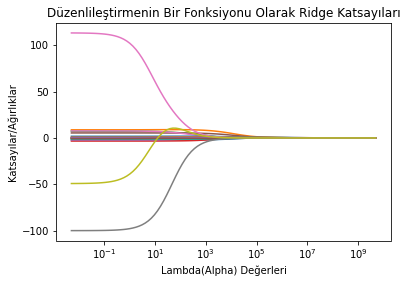

In [87]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 
#burdan cikan her degeri featureslerin katsayilari ile,sirayla carpacaz, 
#100 farkli kombinasyon cikacak galiba

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i) #it take the lambda value than parameter
    ridge_model.fit(X_train, y_train) # we are fitting the model
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) #grafigi cizecegi degerler
ax.set_xscale('log')  # x eksenini ölceklendiriyoruz 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

#here we see the change of coefficent , if we enlarge the value of the lambda

In [88]:
katsayilar
#each lambda take 19 coefficent
# we had 100 lambda values 

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

## Tahmin 

In [89]:
y_pred = ridge_model.predict(X_test)

In [90]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.0517922282827

 ## Model tuning 

Hangi modelin daha iyi oldugunu bulacagiz

In [91]:
lamdalar = 10**np.linspace(10,-2,100)*0.5 

In [92]:
from sklearn.linear_model import RidgeCV #Cross validation
ridge_cv = RidgeCV(alphas = lambdalar,
                  scoring = 'neg_mean_squared_error',
                  normalize = True)

In [93]:
ridge_cv.fit(X_train, y_train)

/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [94]:
ridge_cv.alpha_   #the best value of alpha from lambdalar

0.7599555414764666

In [95]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_,
                   normalize = True).fit(X_train, y_train)

/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [96]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.6826429756415